In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
import sklearn
print(sklearn.__version__)

1.3.1


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler

In [4]:
#Read the CSV file and specify the encoding and data types
PCOS_nutrimood = pd.read_csv(r'C:\Users\User\Downloads\PCOSfdMd_data.csv', encoding='ISO-8859-1')

In [5]:
PCOS_nutrimood.head()

,age,residence_area,job_type,job_physical_activity,stresslevels,sleepduration,sleeprating,sleepTimings,exercisehours,junkfood,...,PCOS(Yes/No),currentMedications,milkType,milkQuantity,emotionalStatus,exerciseAfterDiagnosis,consumptionOfOrganicFood,bmi,BMI,Image
0,28,Urban Area,Working Women,No,4,7,3,10,1,5,...,Yes,"PCOS/ PCOD, Birth Control",Cow,2.0,Yes,0,Yes,Overweight,30.0,data/train/infected\img_0_3982.jpg
1,21,Urban Area,Student,No,4,7,4,2,1,5,...,Yes,PCOS/ PCOD,Cow,1.0,Yes,0,Maybe,Overweight,30.0,data/train/infected\img_0_8689.jpg
2,21,Urban Area,Student,No,3,7,4,2,1,2,...,No,No,Buffalo,1.0,No,0,Yes,Normal,25.0,data/train/notinfected\img_0_6057.jpg
3,23,Urban Area,Student,A little,3,6,3,2,1,2,...,No,No,Buffalo,1.0,Yes,0,Maybe,Underweight,18.5,data/train/notinfected\img_0_6678.jpg
4,21,Urban Area,Student,A little,3,5,3,10,1,2,...,No,No,Buffalo,1.0,Yes,0,Maybe,Normal,25.0,data/train/notinfected\img_0_2879.jpg


In [6]:
#Check the data types of the variables
PCOS_nutrimood.dtypes

age                           int64
residence_area               object
job_type                     object
job_physical_activity        object
stresslevels                  int64
sleepduration                 int64
sleeprating                   int64
sleepTimings                  int64
exercisehours                 int64
junkfood                      int64
smoking                      object
alcohol                      object
sedentaryage                 object
period_startage              object
periodstatus                 object
timebetweenperiods            int64
periodDuration               object
pms                          object
MalePattern_you              object
delayInPeriods              float64
periodstatus_heredity        object
MalePattern_heredity         object
PCOS(Yes/No)                 object
currentMedications           object
milkType                     object
milkQuantity                float64
emotionalStatus              object
exerciseAfterDiagnosis      

In [7]:
print(PCOS_nutrimood.shape)

(79, 32)


In [8]:
PCOS_nutrimood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       79 non-null     int64  
 1   residence_area            79 non-null     object 
 2   job_type                  79 non-null     object 
 3   job_physical_activity     79 non-null     object 
 4   stresslevels              79 non-null     int64  
 5   sleepduration             79 non-null     int64  
 6   sleeprating               79 non-null     int64  
 7   sleepTimings              79 non-null     int64  
 8   exercisehours             79 non-null     int64  
 9   junkfood                  79 non-null     int64  
 10  smoking                   79 non-null     object 
 11  alcohol                   79 non-null     object 
 12  sedentaryage              79 non-null     object 
 13  period_startage           79 non-null     object 
 14  periodstatus

In [9]:
PCOS_nutrimood.keys()

Index(['age', 'residence_area', 'job_type', 'job_physical_activity',
       'stresslevels', 'sleepduration', 'sleeprating', 'sleepTimings',
       'exercisehours', 'junkfood', 'smoking', 'alcohol', 'sedentaryage',
       'period_startage', 'periodstatus', 'timebetweenperiods',
       'periodDuration', 'pms', 'MalePattern_you', 'delayInPeriods',
       'periodstatus_heredity', 'MalePattern_heredity', 'PCOS(Yes/No)',
       'currentMedications', 'milkType', 'milkQuantity', 'emotionalStatus',
       'exerciseAfterDiagnosis', 'consumptionOfOrganicFood', 'bmi', 'BMI',
       'Image'],
      dtype='object')

In [10]:
# Extract object-type columns
object_columns = PCOS_nutrimood.select_dtypes(include=['object']).columns

# Use label encoding for binary conversion
for column in object_columns:
    PCOS_nutrimood[column], _ = pd.factorize(PCOS_nutrimood[column])

# Display the updated DataFrame
print(PCOS_nutrimood)

    age  residence_area  job_type  job_physical_activity  stresslevels  \
0    28               0         0                      0             4   
1    21               0         1                      0             4   
2    21               0         1                      0             3   
3    23               0         1                      1             3   
4    21               0         1                      1             3   
..  ...             ...       ...                    ...           ...   
74   22               1         1                      2             4   
75   22               0         1                      0             3   
76   22               0         1                      2             4   
77   47               0         0                      0             2   
78   47               0         2                      0             1   

    sleepduration  sleeprating  sleepTimings  exercisehours  junkfood  ...  \
0               7            3   

In [11]:
PCOS_nutrimood.isnull().sum()

age                          0
residence_area               0
job_type                     0
job_physical_activity        0
stresslevels                 0
sleepduration                0
sleeprating                  0
sleepTimings                 0
exercisehours                0
junkfood                     0
smoking                      0
alcohol                      0
sedentaryage                 0
period_startage              0
periodstatus                 0
timebetweenperiods           0
periodDuration               0
pms                          0
MalePattern_you              0
delayInPeriods               0
periodstatus_heredity        0
MalePattern_heredity         0
PCOS(Yes/No)                 0
currentMedications           0
milkType                     0
milkQuantity                 0
emotionalStatus              0
exerciseAfterDiagnosis       0
consumptionOfOrganicFood     0
bmi                          0
BMI                         12
Image                        0
dtype: i

In [12]:
# Drop rows with missing values in the 'BMI' column
PCOS_nutrimood_cleaned = PCOS_nutrimood.dropna(subset=['BMI'])

# Display the cleaned DataFrame
print(PCOS_nutrimood_cleaned)

    age  residence_area  job_type  job_physical_activity  stresslevels  \
0    28               0         0                      0             4   
1    21               0         1                      0             4   
2    21               0         1                      0             3   
3    23               0         1                      1             3   
4    21               0         1                      1             3   
..  ...             ...       ...                    ...           ...   
73   21               0         1                      0             5   
74   22               1         1                      2             4   
75   22               0         1                      0             3   
77   47               0         0                      0             2   
78   47               0         2                      0             1   

    sleepduration  sleeprating  sleepTimings  exercisehours  junkfood  ...  \
0               7            3   

In [13]:
# Check for missing values after cleaning
print(PCOS_nutrimood_cleaned.isnull().sum())

age                         0
residence_area              0
job_type                    0
job_physical_activity       0
stresslevels                0
sleepduration               0
sleeprating                 0
sleepTimings                0
exercisehours               0
junkfood                    0
smoking                     0
alcohol                     0
sedentaryage                0
period_startage             0
periodstatus                0
timebetweenperiods          0
periodDuration              0
pms                         0
MalePattern_you             0
delayInPeriods              0
periodstatus_heredity       0
MalePattern_heredity        0
PCOS(Yes/No)                0
currentMedications          0
milkType                    0
milkQuantity                0
emotionalStatus             0
exerciseAfterDiagnosis      0
consumptionOfOrganicFood    0
bmi                         0
BMI                         0
Image                       0
dtype: int64


In [14]:
#Check the data types of the variables
PCOS_nutrimood_cleaned.dtypes

age                           int64
residence_area                int64
job_type                      int64
job_physical_activity         int64
stresslevels                  int64
sleepduration                 int64
sleeprating                   int64
sleepTimings                  int64
exercisehours                 int64
junkfood                      int64
smoking                       int64
alcohol                       int64
sedentaryage                  int64
period_startage               int64
periodstatus                  int64
timebetweenperiods            int64
periodDuration                int64
pms                           int64
MalePattern_you               int64
delayInPeriods              float64
periodstatus_heredity         int64
MalePattern_heredity          int64
PCOS(Yes/No)                  int64
currentMedications            int64
milkType                      int64
milkQuantity                float64
emotionalStatus               int64
exerciseAfterDiagnosis      

In [15]:
# Specify the features to convert to numeric
columns = ['age', 'residence_area', 'job_type', 'job_physical_activity',
       'stresslevels', 'sleepduration', 'sleeprating', 'sleepTimings',
       'exercisehours', 'junkfood', 'smoking', 'alcohol', 'sedentaryage',
       'period_startage', 'periodstatus', 'timebetweenperiods',
       'periodDuration', 'pms', 'MalePattern_you', 'delayInPeriods',
       'periodstatus_heredity', 'MalePattern_heredity', 'PCOS(Yes/No)',
       'currentMedications', 'milkType', 'milkQuantity', 'emotionalStatus',
       'exerciseAfterDiagnosis', 'consumptionOfOrganicFood', 'bmi', 'BMI',
       'Image']

# Round the specified columns to two decimal places
PCOS_nutrimood_cleaned[columns] = PCOS_nutrimood_cleaned[columns].round(2)

# Specify the features to convert to numeric
column_name = ['delayInPeriods', 'milkQuantity', 'BMI']
# Convert the float column to integer
PCOS_nutrimood_cleaned[column_name] = PCOS_nutrimood_cleaned[column_name].astype(int)

C:\Users\User\AppData\Local\Temp\ipykernel_34356\1073401801.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PCOS_nutrimood_cleaned[columns] = PCOS_nutrimood_cleaned[columns].round(2)
C:\Users\User\AppData\Local\Temp\ipykernel_34356\1073401801.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PCOS_nutrimood_cleaned[column_name] = PCOS_nutrimood_cleaned[column_name].astype(int)


In [16]:
#Check the data types of the variables
PCOS_nutrimood_cleaned.dtypes

age                         int64
residence_area              int64
job_type                    int64
job_physical_activity       int64
stresslevels                int64
sleepduration               int64
sleeprating                 int64
sleepTimings                int64
exercisehours               int64
junkfood                    int64
smoking                     int64
alcohol                     int64
sedentaryage                int64
period_startage             int64
periodstatus                int64
timebetweenperiods          int64
periodDuration              int64
pms                         int64
MalePattern_you             int64
delayInPeriods              int32
periodstatus_heredity       int64
MalePattern_heredity        int64
PCOS(Yes/No)                int64
currentMedications          int64
milkType                    int64
milkQuantity                int32
emotionalStatus             int64
exerciseAfterDiagnosis      int64
consumptionOfOrganicFood    int64
bmi           

In [17]:
PCOS_nutrimood_cleaned.corr()

,age,residence_area,job_type,job_physical_activity,stresslevels,sleepduration,sleeprating,sleepTimings,exercisehours,junkfood,...,PCOS(Yes/No),currentMedications,milkType,milkQuantity,emotionalStatus,exerciseAfterDiagnosis,consumptionOfOrganicFood,bmi,BMI,Image
age,1.000000,-0.078179,-0.018610,0.226973,-0.256098,-0.010930,-0.243999,-0.039698,1.379583e-01,-0.291383,...,0.140503,0.035756,0.124359,-0.051475,0.132917,NaN,8.901076e-02,-0.225458,0.222903,0.229486
residence_area,-0.078179,1.000000,-0.130696,0.118908,-0.045429,-0.170981,-0.007349,-0.033569,-9.866167e-02,0.077726,...,0.029468,-0.169496,0.018039,0.155472,-0.169366,NaN,-1.992726e-01,-0.208135,0.198471,0.082293
job_type,-0.018610,-0.130696,1.000000,0.103465,0.059423,-0.036688,-0.109652,-0.026517,8.728342e-02,-0.054801,...,-0.047240,0.055101,-0.049620,0.015074,-0.010115,NaN,1.351567e-01,-0.053564,0.047894,0.165139
job_physical_activity,0.226973,0.118908,0.103465,1.000000,0.059794,-0.248707,-0.114112,0.109086,7.460471e-02,-0.007633,...,0.011648,-0.203909,-0.053534,-0.122211,-0.191873,NaN,2.475513e-01,-0.099023,0.086015,0.204190
stresslevels,-0.256098,-0.045429,0.059423,0.059794,1.000000,-0.133760,0.015778,0.095631,-1.584136e-01,0.248543,...,-0.178877,-0.061049,-0.009898,-0.178184,-0.494455,NaN,-4.278494e-02,-0.083988,0.066495,0.179578
sleepduration,-0.010930,-0.170981,-0.036688,-0.248707,-0.133760,1.000000,0.353212,-0.117216,5.576493e-02,-0.209902,...,0.267139,0.111202,0.278043,-0.006871,0.114110,NaN,1.475617e-01,0.152667,-0.137281,0.145308
sleeprating,-0.243999,-0.007349,-0.109652,-0.114112,0.015778,0.353212,1.000000,0.010966,-2.199526e-02,-0.062739,...,0.083837,-0.037216,-0.003721,0.308808,0.154814,NaN,-5.285054e-02,0.077908,-0.085852,-0.028406
sleepTimings,-0.039698,-0.033569,-0.026517,0.109086,0.095631,-0.117216,0.010966,1.000000,1.231661e-01,0.017825,...,0.043538,-0.126873,-0.023943,-0.065039,-0.036182,NaN,-1.619323e-01,-0.197923,0.197478,-0.174018
exercisehours,0.137958,-0.098662,0.087283,0.074605,-0.158414,0.055765,-0.021995,0.123166,1.000000e+00,-0.047785,...,-0.013686,-0.336234,0.019342,-0.134616,0.237030,NaN,1.677726e-17,-0.148316,0.142037,0.013094
junkfood,-0.291383,0.077726,-0.054801,-0.007633,0.248543,-0.209902,-0.062739,0.017825,-4.778452e-02,1.000000,...,-0.230018,-0.125388,-0.157188,0.143163,-0.157719,NaN,2.430440e-02,0.177157,-0.176580,-0.153871


In [18]:
# Calculate the correlation of each feature with the target variable 'age'
correlation_with_target = PCOS_nutrimood_cleaned.corr()['age'].abs()

# Sort the features in descending order based on their correlation
sorted_features = correlation_with_target.sort_values(ascending=False)

# Display the sorted features
print(sorted_features)

age                         1.000000
sedentaryage                0.327626
junkfood                    0.291383
pms                         0.283029
stresslevels                0.256098
sleeprating                 0.243999
Image                       0.229486
job_physical_activity       0.226973
bmi                         0.225458
BMI                         0.222903
period_startage             0.185175
MalePattern_heredity        0.167495
PCOS(Yes/No)                0.140503
exercisehours               0.137958
periodstatus_heredity       0.137581
emotionalStatus             0.132917
milkType                    0.124359
consumptionOfOrganicFood    0.089011
MalePattern_you             0.088563
residence_area              0.078179
alcohol                     0.068237
periodDuration              0.053659
milkQuantity                0.051475
sleepTimings                0.039698
periodstatus                0.036551
currentMedications          0.035756
job_type                    0.018610
d

In [19]:
# Assuming df is your DataFrame
sorted_features_cleaned = sorted_features.dropna()

# Check if NaN values are removed
print(sorted_features_cleaned.isnull().sum())

0


In [20]:
sorted_features_cleaned.corr

<bound method Series.corr of age                         1.000000
sedentaryage                0.327626
junkfood                    0.291383
pms                         0.283029
stresslevels                0.256098
sleeprating                 0.243999
Image                       0.229486
job_physical_activity       0.226973
bmi                         0.225458
BMI                         0.222903
period_startage             0.185175
MalePattern_heredity        0.167495
PCOS(Yes/No)                0.140503
exercisehours               0.137958
periodstatus_heredity       0.137581
emotionalStatus             0.132917
milkType                    0.124359
consumptionOfOrganicFood    0.089011
MalePattern_you             0.088563
residence_area              0.078179
alcohol                     0.068237
periodDuration              0.053659
milkQuantity                0.051475
sleepTimings                0.039698
periodstatus                0.036551
currentMedications          0.035756
job_type 

In [21]:
# Calculate the correlation of each feature with the target variable 'age'
correlatn_with_target = PCOS_nutrimood_cleaned.corr()['age'].abs()

# Sort the features in descending order based on their correlation
srtd_features = correlatn_with_target.sort_values(ascending=False)

# Display the sorted features
print(srtd_features)

age                         1.000000
sedentaryage                0.327626
junkfood                    0.291383
pms                         0.283029
stresslevels                0.256098
sleeprating                 0.243999
Image                       0.229486
job_physical_activity       0.226973
bmi                         0.225458
BMI                         0.222903
period_startage             0.185175
MalePattern_heredity        0.167495
PCOS(Yes/No)                0.140503
exercisehours               0.137958
periodstatus_heredity       0.137581
emotionalStatus             0.132917
milkType                    0.124359
consumptionOfOrganicFood    0.089011
MalePattern_you             0.088563
residence_area              0.078179
alcohol                     0.068237
periodDuration              0.053659
milkQuantity                0.051475
sleepTimings                0.039698
periodstatus                0.036551
currentMedications          0.035756
job_type                    0.018610
d

C:\Users\User\AppData\Local\Temp\ipykernel_34356\1184223676.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PCOS_nutrimood_cleaned[columns_to_convert] = PCOS_nutrimood_cleaned[columns_to_convert].astype(int)


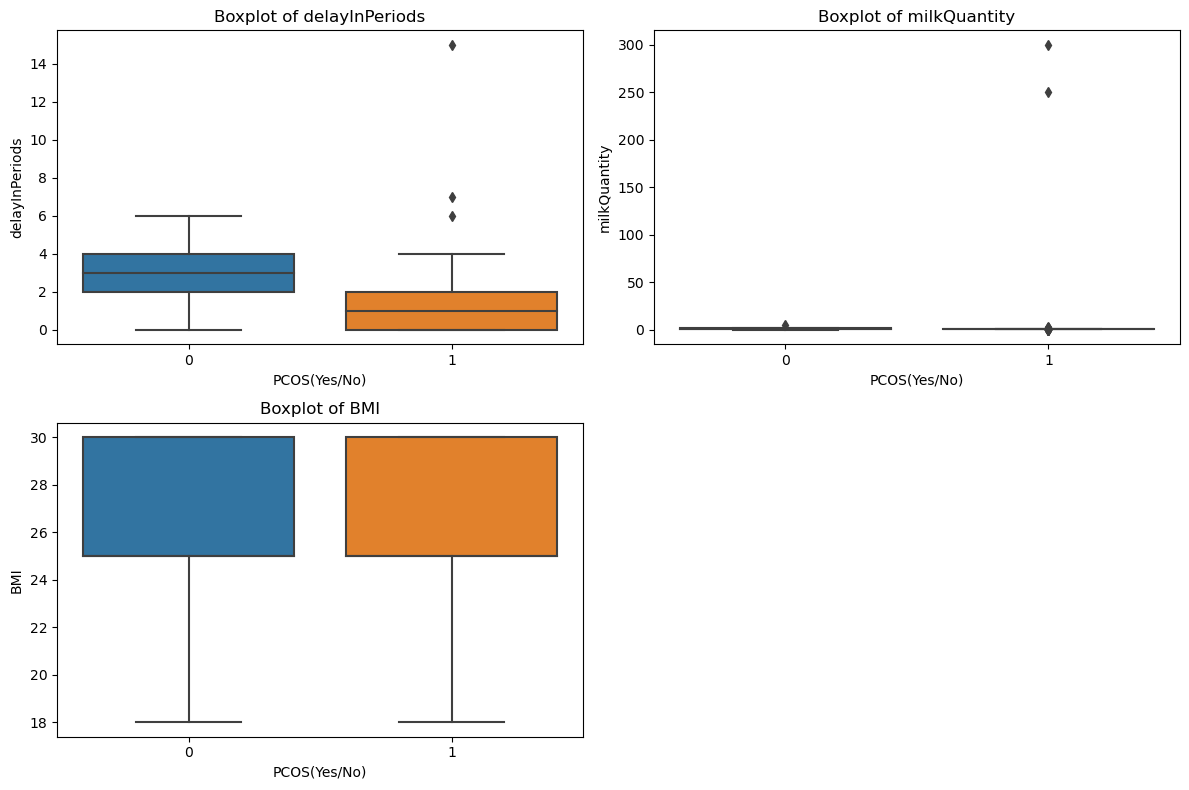

In [22]:
# I am Specifying the features to convert to numeric
columns_to_convert = ['delayInPeriods', 'milkQuantity', 'BMI']

# Convert the specified float columns to integer
PCOS_nutrimood_cleaned[columns_to_convert] = PCOS_nutrimood_cleaned[columns_to_convert].astype(int)

# Create boxplots
plt.figure(figsize=(12, 8))
for column in columns_to_convert:
    plt.subplot(2, 2, columns_to_convert.index(column) + 1)
    sns.boxplot(x='PCOS(Yes/No)', y=column, data=PCOS_nutrimood_cleaned)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_34356\4228403662.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PCOS_nutrimood_cleaned[numeric_features] = PCOS_nutrimood_cleaned[numeric_features].apply(pd.to_numeric, errors='coerce')
C:\Users\User\AppData\Local\Temp\ipykernel_34356\4228403662.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PCOS_nutrimood_cleaned['emotionalStatus'] = PCOS_nutrimood_cleaned['emotionalStatus'].astype('str')


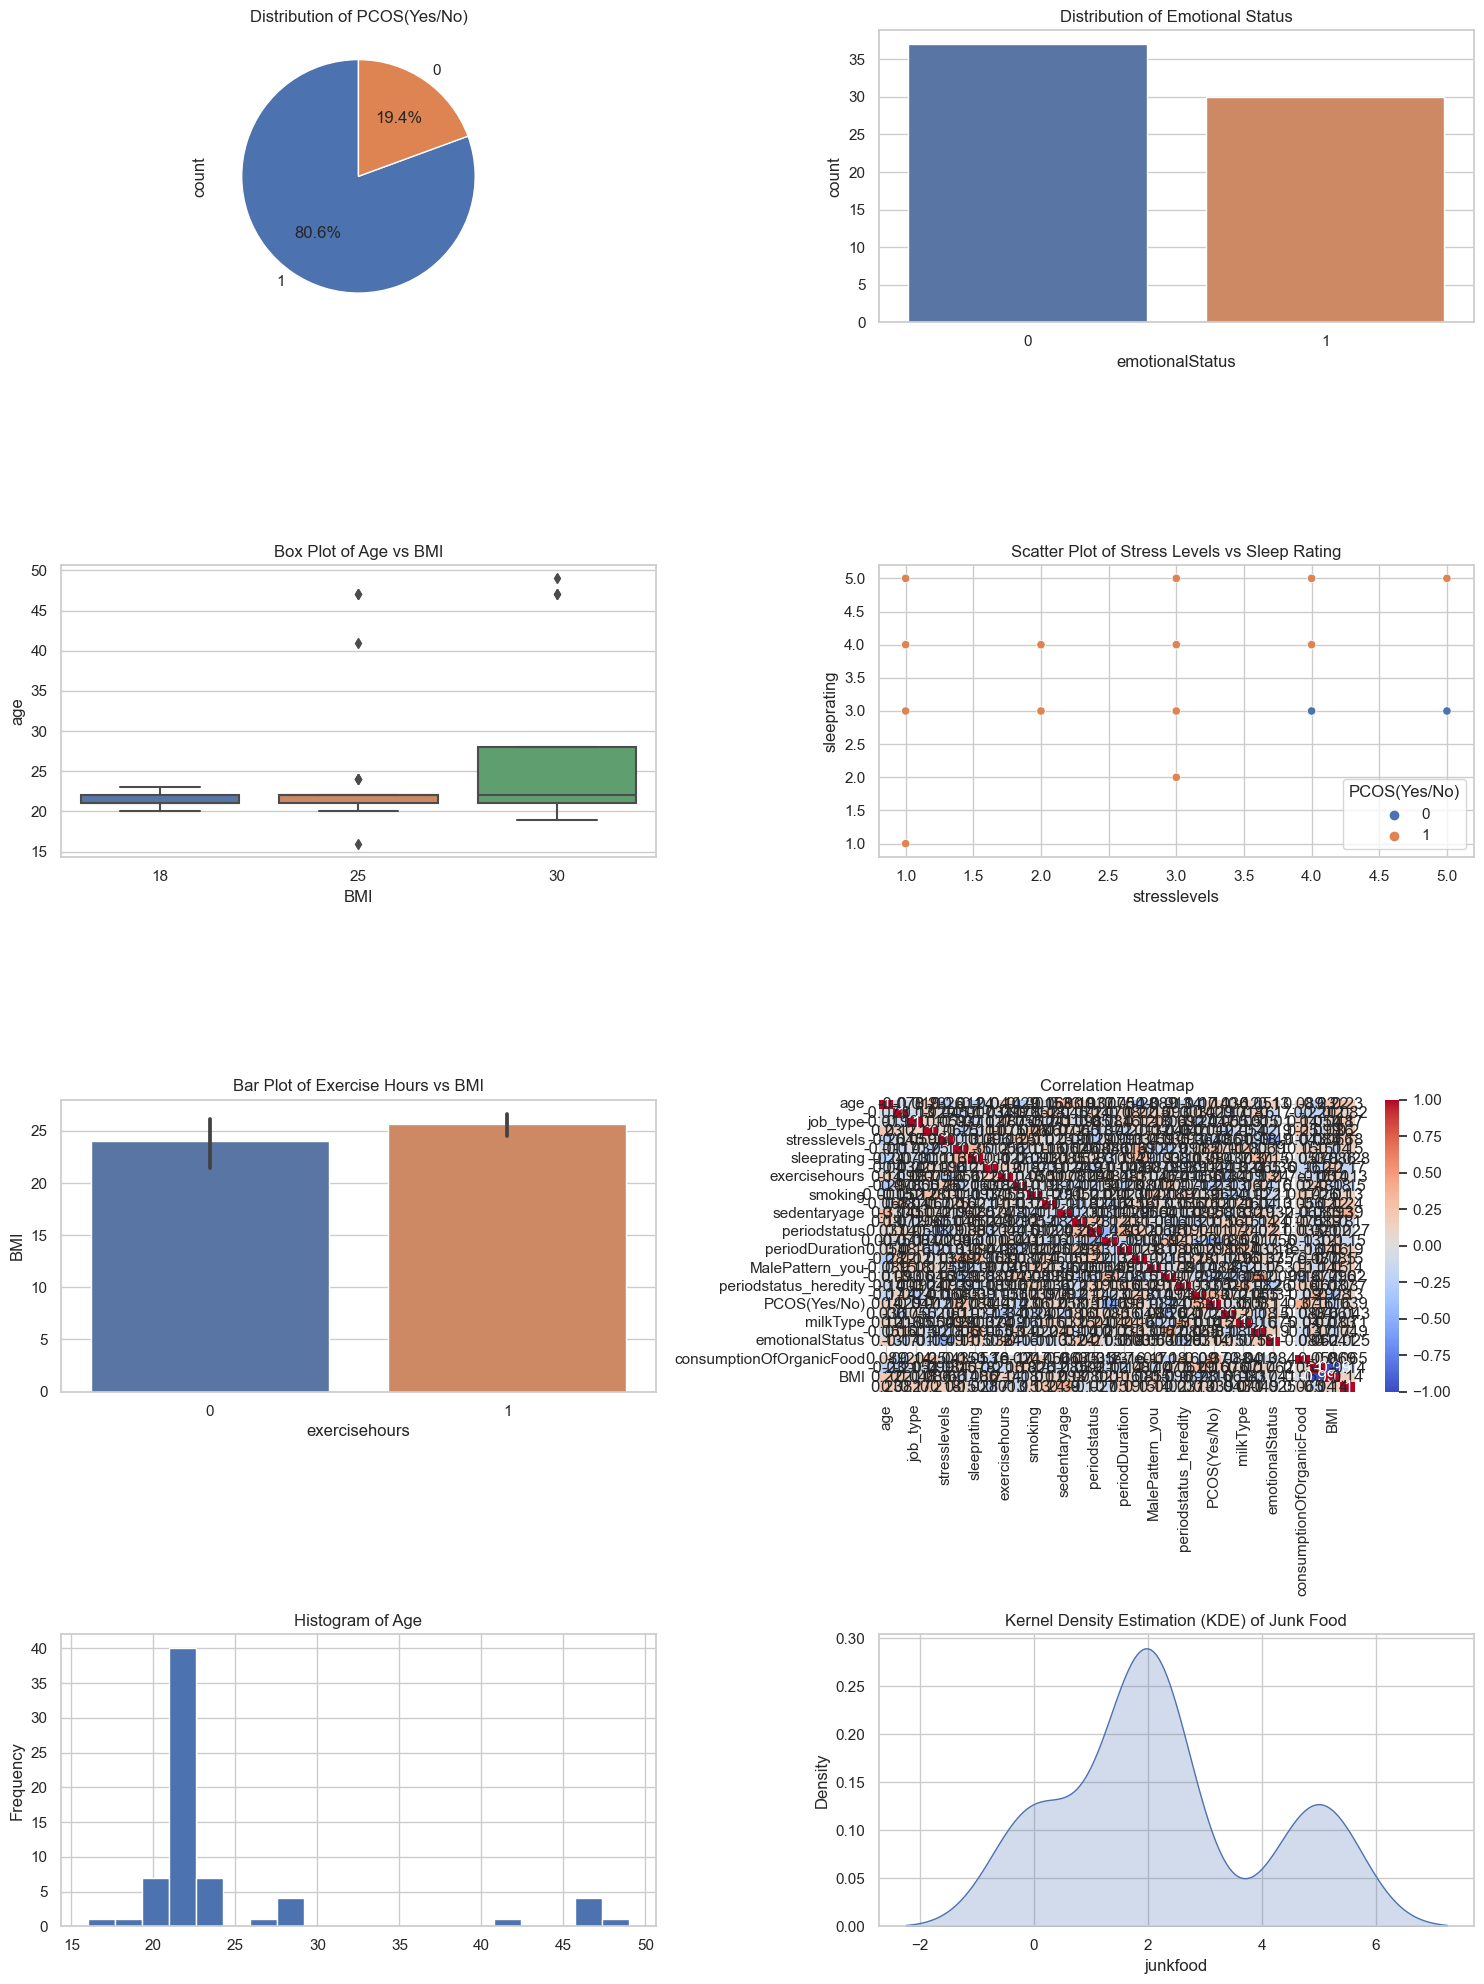

In [23]:
# Specify the features to convert to numeric
numeric_features = ['age', 'residence_area', 'job_type', 'job_physical_activity',
                    'stresslevels', 'sleepduration', 'sleeprating', 'sleepTimings',
                    'exercisehours', 'junkfood', 'smoking', 'alcohol', 'sedentaryage',
                    'period_startage', 'periodstatus', 'timebetweenperiods',
                    'periodDuration', 'pms', 'MalePattern_you', 'delayInPeriods',
                    'periodstatus_heredity', 'MalePattern_heredity', 'PCOS(Yes/No)',
                    'currentMedications', 'milkType', 'milkQuantity', 'emotionalStatus',
                    'consumptionOfOrganicFood', 'bmi', 'BMI', 'Image']

# Convert the specified features to numeric
PCOS_nutrimood_cleaned[numeric_features] = PCOS_nutrimood_cleaned[numeric_features].apply(pd.to_numeric, errors='coerce')

# Set the style for Seaborn
sns.set(style="whitegrid")

# Convert 'emotionalStatus' to string
PCOS_nutrimood_cleaned['emotionalStatus'] = PCOS_nutrimood_cleaned['emotionalStatus'].astype('str')

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

# Plot pie chart
PCOS_nutrimood_cleaned['PCOS(Yes/No)'].value_counts().plot.pie(ax=axes[0, 0], autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Distribution of PCOS(Yes/No)')

# Plot bar chart
sns.countplot(x='emotionalStatus', data=PCOS_nutrimood_cleaned, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Emotional Status')

# Plot box plot
sns.boxplot(x='BMI', y='age', data=PCOS_nutrimood_cleaned, ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of Age vs BMI')

# Plot scatter plot
sns.scatterplot(x='stresslevels', y='sleeprating', hue='PCOS(Yes/No)', data=PCOS_nutrimood_cleaned, ax=axes[1, 1])
axes[1, 1].set_title('Scatter Plot of Stress Levels vs Sleep Rating')

# Plot bar plot
sns.barplot(x='exercisehours', y='BMI', data=PCOS_nutrimood_cleaned, ax=axes[2, 0])
axes[2, 0].set_title('Bar Plot of Exercise Hours vs BMI')

#Plot heatmap
correlation_matrix = PCOS_nutrimood_cleaned.corr()

# Plot heatmap on a specific set of axes
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,center=0, ax=axes[2, 1])
axes[2, 1].set_title('Correlation Heatmap')

# Plot histogram
PCOS_nutrimood_cleaned['age'].plot.hist(bins=20, ax=axes[3, 0])
axes[3, 0].set_title('Histogram of Age')

# Plot KDE plot
sns.kdeplot(PCOS_nutrimood_cleaned['junkfood'], ax=axes[3, 1], fill=True)
axes[3, 1].set_title('Kernel Density Estimation (KDE) of Junk Food')

# Adjust layout
plt.tight_layout()
plt.show()

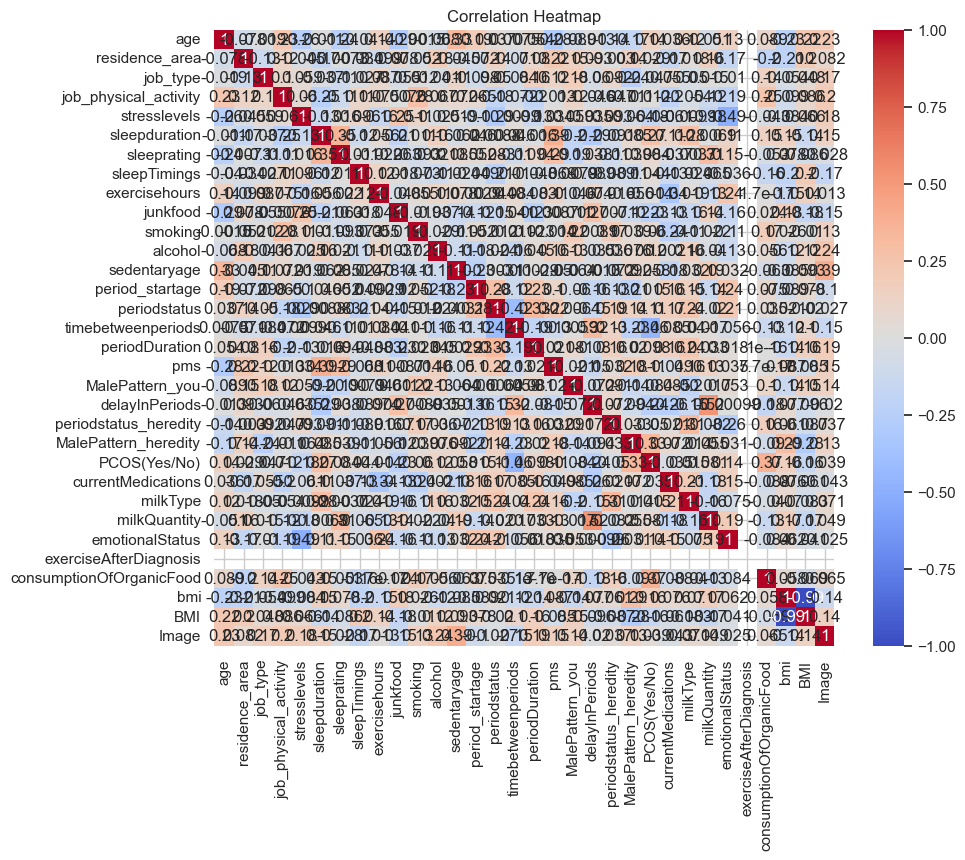

In [24]:
#Plot heatmap
correlation_matrix = PCOS_nutrimood_cleaned.corr()
# Create a figure with specific size
fig, axes = plt.subplots(figsize=(10, 8))

# Plot heatmap on a specific set of axes
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,center=0, ax=axes)
axes.set_title('Correlation Heatmap')

# Display the plot
plt.show()

In [25]:
# Sort the Series in descending order
top_15_features = sorted_features_cleaned.head(16).sort_values(ascending=False).reset_index()
top_15_features.columns = ['Variable', 'Correlation']
print(top_15_features)

                 Variable  Correlation
0                     age     1.000000
1            sedentaryage     0.327626
2                junkfood     0.291383
3                     pms     0.283029
4            stresslevels     0.256098
5             sleeprating     0.243999
6                   Image     0.229486
7   job_physical_activity     0.226973
8                     bmi     0.225458
9                     BMI     0.222903
10        period_startage     0.185175
11   MalePattern_heredity     0.167495
12           PCOS(Yes/No)     0.140503
13          exercisehours     0.137958
14  periodstatus_heredity     0.137581
15        emotionalStatus     0.132917


In [26]:
NutriMood_newdt = PCOS_nutrimood_cleaned[['age','sedentaryage', 'junkfood',  'pms', 'stresslevels', 'sleeprating', 'Image', 'job_physical_activity', 'BMI', 'period_startage', 'MalePattern_heredity', 'PCOS(Yes/No)', 'exercisehours', 'periodstatus_heredity',  'emotionalStatus']]

In [27]:
# Save the updated DataFrame to a new CSV file
NutriMood_newdt.to_csv('cleanednutrimood.csv', index=False)

# display the updated dataframe
print(NutriMood_newdt)

    age  sedentaryage  junkfood  pms  stresslevels  sleeprating  Image  \
0    28             0         5    0             4            3      0   
1    21             1         5    1             4            4      1   
2    21             2         2    2             3            4      2   
3    23             3         2    1             3            3      3   
4    21             4         2    1             3            3      4   
..  ...           ...       ...  ...           ...          ...    ...   
73   21             5         5    1             5            3     72   
74   22             5         5    1             4            3     73   
75   22             4         2    1             3            3     74   
77   47            10         0    1             2            3     76   
78   47            10         0    1             1            1     77   

    job_physical_activity  BMI  period_startage  MalePattern_heredity  \
0                       0   30        

In [28]:
NutriMood_newdt.isnull().sum()

age                      0
sedentaryage             0
junkfood                 0
pms                      0
stresslevels             0
sleeprating              0
Image                    0
job_physical_activity    0
BMI                      0
period_startage          0
MalePattern_heredity     0
PCOS(Yes/No)             0
exercisehours            0
periodstatus_heredity    0
emotionalStatus          0
dtype: int64

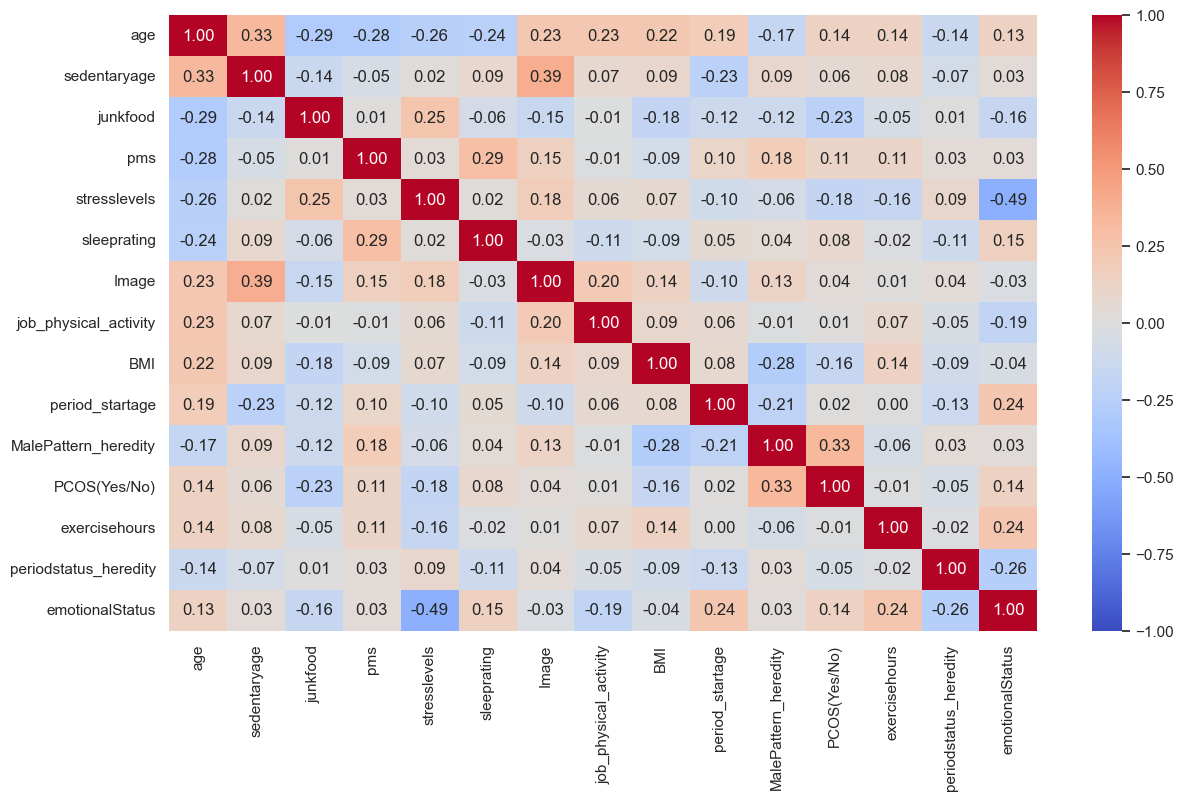

In [29]:
plt.figure(figsize=(14,8))
sns.heatmap(NutriMood_newdt.corr(),annot=True, vmin=-1, vmax=1,center=0, cmap='coolwarm', fmt='.2f')
plt.show()

In [30]:
NutriMood_newdt['age'].value_counts()

age
21    21
22    19
20     7
28     4
23     4
47     4
24     3
16     1
41     1
26     1
49     1
19     1
Name: count, dtype: int64

In [31]:
# Extract features and target variable
X = NutriMood_newdt.drop(['junkfood'],axis=1)
y = NutriMood_newdt['junkfood']  

# Normalize the data
sc = StandardScaler()
X = sc.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

# Evaluate Decision Tree
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_predictions))
print("Decision Tree Confusion matrix :\n", confusion_matrix(y_test, dt_predictions))

Decision Tree Accuracy: 0.2857142857142857
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           2       0.43      0.38      0.40         8
           5       0.25      0.25      0.25         4

    accuracy                           0.29        14
   macro avg       0.23      0.21      0.22        14
weighted avg       0.32      0.29      0.30        14

Decision Tree Confusion matrix :
 [[0 1 1]
 [3 3 2]
 [0 3 1]]


In [32]:
# 2. Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluate Random Forest
print("\nRandom Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))


Random Forest Accuracy: 0.5
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           2       0.56      0.62      0.59         8
           5       0.67      0.50      0.57         4

    accuracy                           0.50        14
   macro avg       0.41      0.38      0.39        14
weighted avg       0.51      0.50      0.50        14



In [33]:
# 3. Support Vector Machine (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

# Evaluate SVM
print("\nSVM Accuracy:", accuracy_score(y_test, svm_predictions))
print("SVM Classification Report:\n", classification_report(y_test, svm_predictions))


SVM Accuracy: 0.6428571428571429
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           2       0.62      1.00      0.76         8
           5       1.00      0.25      0.40         4

    accuracy                           0.64        14
   macro avg       0.54      0.42      0.39        14
weighted avg       0.64      0.64      0.55        14



C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
# 4. Logistic Regression
logregNutrimood = LogisticRegression()
logregNutrimood.fit(X_train,y_train)
y_pred = logregNutrimood.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.5714285714285714
Confusion Matrix:
[[0 1 1]
 [2 6 0]
 [0 2 2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           2       0.67      0.75      0.71         8
           5       0.67      0.50      0.57         4

    accuracy                           0.57        14
   macro avg       0.44      0.42      0.43        14
weighted avg       0.57      0.57      0.57        14



In [35]:
# 5. K-Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
yknn_pred = knn.predict(X_test)

# Making predictions on the test set
accuracy = accuracy_score(y_test, yknn_pred)
print('Accuracy of K-nearest Neighbor classifier on test set:', accuracy)

confusion_matrix = confusion_matrix(y_test, yknn_pred)
print('\nThe confusion Matrix is : \n',confusion_matrix)

print('\nThe evaluation parameters are : \n',classification_report(y_test, yknn_pred))

Accuracy of K-nearest Neighbor classifier on test set: 0.5

The confusion Matrix is : 
 [[1 1 0]
 [2 5 1]
 [1 2 1]]

The evaluation parameters are : 
               precision    recall  f1-score   support

           0       0.25      0.50      0.33         2
           2       0.62      0.62      0.62         8
           5       0.50      0.25      0.33         4

    accuracy                           0.50        14
   macro avg       0.46      0.46      0.43        14
weighted avg       0.54      0.50      0.50        14



In [36]:
# Extract features and target variable(Emotional Status)
x = NutriMood_newdt.drop(['emotionalStatus'],axis=1)
Y = NutriMood_newdt['emotionalStatus'] 

# Normalize the data
sc = StandardScaler()
x = sc.fit_transform(X)

# Split the data into training and testing sets
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

# 1. Decision Tree
dtN_model = DecisionTreeClassifier(random_state=42)
dtN_model.fit(x_train, Y_train)
dtN_predictions = dtN_model.predict(x_test)

# Evaluate Decision Tree
print("Decision Tree Accuracy:", accuracy_score(Y_test, dtN_predictions))
print("Decision Tree Classification Report:\n", classification_report(Y_test, dtN_predictions))

Decision Tree Accuracy: 1.0
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         4

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

